#1. File upload

face_cascade_name = 'haarcascade_frontalface_alt.xml'

eyes_cascade_name = 'haarcascade_eye_tree_eyeglasses.xml'

file_name = 'obama_01.mp4'


In [1]:
from google.colab import files
files.upload()

Saving haarcascade_eye_tree_eyeglasses.xml to haarcascade_eye_tree_eyeglasses.xml
Saving haarcascade_frontalface_alt.xml to haarcascade_frontalface_alt.xml
Saving obama_01.mp4 to obama_01.mp4


In [2]:
!ls -al

total 10140
drwxr-xr-x 1 root root    4096 Mar  8 10:05 .
drwxr-xr-x 1 root root    4096 Mar  8 10:03 ..
drwxr-xr-x 4 root root    4096 Mar  1 14:35 .config
-rw-r--r-- 1 root root  601661 Mar  8 10:05 haarcascade_eye_tree_eyeglasses.xml
-rw-r--r-- 1 root root  676709 Mar  8 10:05 haarcascade_frontalface_alt.xml
-rw-r--r-- 1 root root 9083585 Mar  8 10:06 obama_01.mp4
drwxr-xr-x 1 root root    4096 Mar  1 14:35 sample_data


#2. load File

In [13]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import IPython

In [4]:
file_name = 'obama_01.mp4'
face_cascade_name = 'haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'haarcascade_eye_tree_eyeglasses.xml'

In [5]:
face_cascade = cv2.CascadeClassifier()
eyes_cascade = cv2.CascadeClassifier()

In [6]:
#-- 1. Load the cascades
if not face_cascade.load(cv2.samples.findFile(face_cascade_name)):
    print('--(!)Error loading face cascade')
    exit(0)    
if not eyes_cascade.load(cv2.samples.findFile(eyes_cascade_name)):
    print('--(!)Error loading eyes cascade')
    exit(0)    

In [17]:
def detectAndDisplay(frame):
    IPython.display.clear_output(wait = True)
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_gray = cv2.equalizeHist(frame_gray)
    #-- Detect faces
    faces = face_cascade.detectMultiScale(frame_gray)
    for (x,y,w,h) in faces:
        center = (x + w//2, y + h//2)
        frame = cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 4)
        faceROI = frame_gray[y:y+h,x:x+w]
        #-- In each face, detect eyes
        eyes = eyes_cascade.detectMultiScale(faceROI)
        for (x2,y2,w2,h2) in eyes:
            eye_center = (x + x2 + w2//2, y + y2 + h2//2)
            radius = int(round((w2 + h2)*0.25))
            frame = cv2.circle(frame, eye_center, radius, (255, 0, 0 ), 4)
    cv2_imshow(frame)

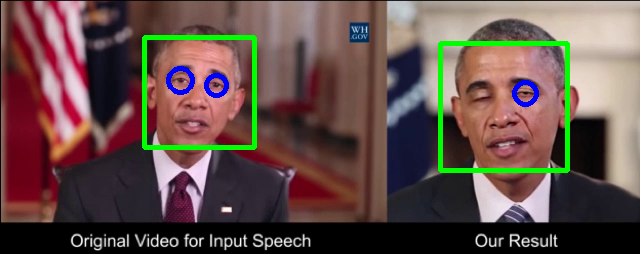

--(!) No captured frame -- Break!


In [18]:
cap = cv2.VideoCapture(file_name)
if not cap.isOpened:
    print('--(!)Error opening video capture')
    exit(0)
while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break
    detectAndDisplay(frame)